In [29]:
import sys, os
dir1 = os.path.abspath(os.path.join(os.path.abspath(''), '..', '..'))
if not dir1 in sys.path: sys.path.append(dir1)

from utils.environment import setup_data_vars

setup_data_vars()

In [30]:
# View the results from directory 
id = 1
slice = 70
axis = 0
anatomy = 'Anorectum'
img_dir = os.path.join(os.environ.get('MedSAM_preprocessed'), 'imgs', f'axis{str(axis)}')
gt_dir = os.path.join(os.environ.get('MedSAM_preprocessed'), 'gts', anatomy.capitalize(), f'axis{str(axis)}')

img_path = os.path.join(img_dir, f'CT_zzAMLART_{str(id).zfill(3)}-{str(slice).zfill(3)}.npy')
gt_path = os.path.join(gt_dir, f'CT_{anatomy}_zzAMLART_{str(id).zfill(3)}-{str(slice).zfill(3)}.npy')

print('/vol/biomedic3/bglocker/ugproj2324/az620/radiotherapy/data/MedSAM_preprocessed/imgs/axis0/CT_zzAMLART_001-070.npy')
print(img_path)

print('/vol/biomedic3/bglocker/ugproj2324/az620/radiotherapy/data/MedSAM_preprocessed/gts/Anorectum/axis0/CT_Anorectum_zzAMLART_001-070.npy')
print(gt_path)

/vol/biomedic3/bglocker/ugproj2324/az620/radiotherapy/data/MedSAM_preprocessed/imgs/axis0/CT_zzAMLART_001-070.npy
/vol/biomedic3/bglocker/ugproj2324/az620/radiotherapy/data/MedSAM_preprocessed/imgs/axis0/CT_zzAMLART_001-070.npy
/vol/biomedic3/bglocker/ugproj2324/az620/radiotherapy/data/MedSAM_preprocessed/gts/Anorectum/axis0/CT_Anorectum_zzAMLART_001-070.npy
/vol/biomedic3/bglocker/ugproj2324/az620/radiotherapy/data/MedSAM_preprocessed/gts/Anorectum/axis0/CT_Anorectum_zzAMLART_001-070.npy


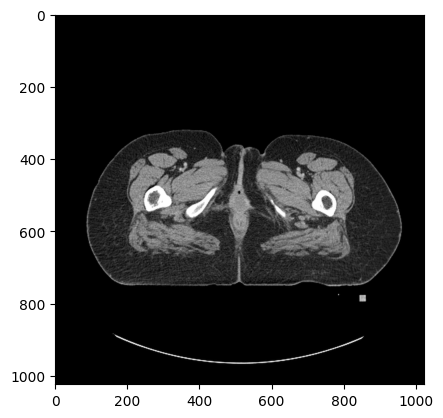

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Load the npy file
data = np.load(img_path)

# Display the image
plt.imshow(data)
plt.show()


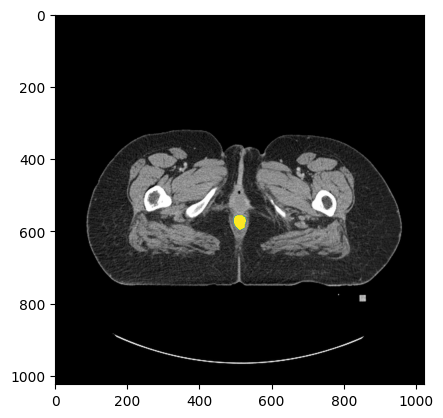

In [32]:
gt = np.load(gt_path)

alpha_mask_pred = np.where(gt > 0, 1, 0).astype(np.float32)
plt.imshow(data, cmap='gray')
plt.imshow(gt, alpha=alpha_mask_pred, cmap='viridis')
plt.show()

In [34]:
# For the given image id, create a subfigure of all the slices that contain segmentations.

id_slices_imgs = [f for f in os.listdir(img_dir) if f.startswith(f'CT_zzAMLART_{str(id).zfill(3)}')]
id_slices_gts = [f for f in os.listdir(gt_dir) if f.startswith(f'CT_{anatomy.capitalize()}_zzAMLART_{str(id).zfill(3)}')]

In [38]:
nrows = len(id_slices_imgs)
ncols = 2

fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows))

for i, (img, gt) in enumerate(zip(id_slices_imgs, id_slices_gts)):
    img_path = os.path.join(img_dir, img)
    gt_path = os.path.join(gt_dir, gt)
    data = np.load(img_path)
    gt = np.load(gt_path)
    alpha_mask_pred = np.where(gt > 0, 1, 0).astype(np.float32)
    axs[i, 0].imshow(data, cmap='gray')
    axs[i, 1].imshow(data, cmap='gray')
    axs[i, 1].imshow(gt, alpha=alpha_mask_pred, cmap='viridis')
    axs[i, 0].axis('off')
    axs[i, 1].axis('off')